In [29]:
import streamlit as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import io

In [30]:


import warnings
warnings.filterwarnings('ignore')

path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/life.csv"
df = pd.read_csv(path)
df

,Country,Year,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life_exp
0,Afghanistan,2015,263.0,62,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,74.0,0,364.975229,99.0,0,58.0,0,99.0,99.0,0.1,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,19.0,21,0.000000,95.0,63,59.5,24,95.0,95.0,0.1,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,335.0,66,0.000000,64.0,118,23.3,98,7.0,64.0,1.9,8.3,8.2,0.531,11.4,52.4
4,Antigua and Barbuda,2015,13.0,0,0.000000,99.0,0,47.7,0,86.0,99.0,0.2,3.3,3.3,0.784,13.9,76.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2015,157.0,9,0.000000,87.0,0,62.1,10,87.0,87.0,0.1,1.6,1.5,0.769,14.3,74.1
179,Viet Nam,2015,127.0,28,0.000000,97.0,256,17.5,35,97.0,97.0,0.1,14.2,14.5,0.678,12.6,76.0
180,Yemen,2015,224.0,37,0.000000,69.0,468,41.3,47,63.0,69.0,0.1,13.6,13.4,0.499,9.0,65.7
181,Zambia,2015,33.0,27,0.000000,9.0,9,23.4,40,9.0,9.0,4.1,6.3,6.1,0.576,12.5,61.8


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Year                             183 non-null    int64  
 2   Adult Mortality                  183 non-null    float64
 3   infant deaths                    183 non-null    int64  
 4   percentage expenditure           183 non-null    float64
 5   Hepatitis B                      183 non-null    float64
 6   Measles                          183 non-null    int64  
 7    BMI                             183 non-null    float64
 8   under-five deaths                183 non-null    int64  
 9   Polio                            183 non-null    float64
 10  Diphtheria                       183 non-null    float64
 11   HIV/AIDS                        183 non-null    float64
 12   thinness  1-19 years 

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,183.0,2015.000000,0.000000,2015.000,2015.0000,2015.000000,2015.0000,2015.000000
Adult Mortality,183.0,152.863388,97.561184,1.000,74.0000,138.000000,213.0000,484.000000
infant deaths,183.0,23.803279,83.683762,0.000,0.0000,2.000000,17.0000,910.000000
percentage expenditure,183.0,2.383906,27.461032,0.000,0.0000,0.000000,0.0000,364.975229
Hepatitis B,183.0,82.425287,23.407349,6.000,81.0000,92.000000,97.0000,99.000000
Measles,183.0,1502.901639,7842.394928,0.000,0.0000,17.000000,202.0000,90387.000000
BMI,183.0,42.754144,20.571730,2.500,24.3000,48.600000,61.3500,77.600000
under-five deaths,183.0,31.612022,107.779778,0.000,0.0000,3.000000,21.0000,1100.000000
Polio,183.0,83.207650,24.245778,5.000,83.0000,93.000000,97.0000,99.000000
Diphtheria,183.0,84.633880,22.162793,6.000,83.5000,93.000000,97.0000,99.000000


In [33]:
df.isnull().sum() # per ogni colonna verifico valori nulli

Country                            0
Year                               0
Adult Mortality                    0
infant deaths                      0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Diphtheria                         0
 HIV/AIDS                          0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life_exp                           0
dtype: int64

<Axes: >

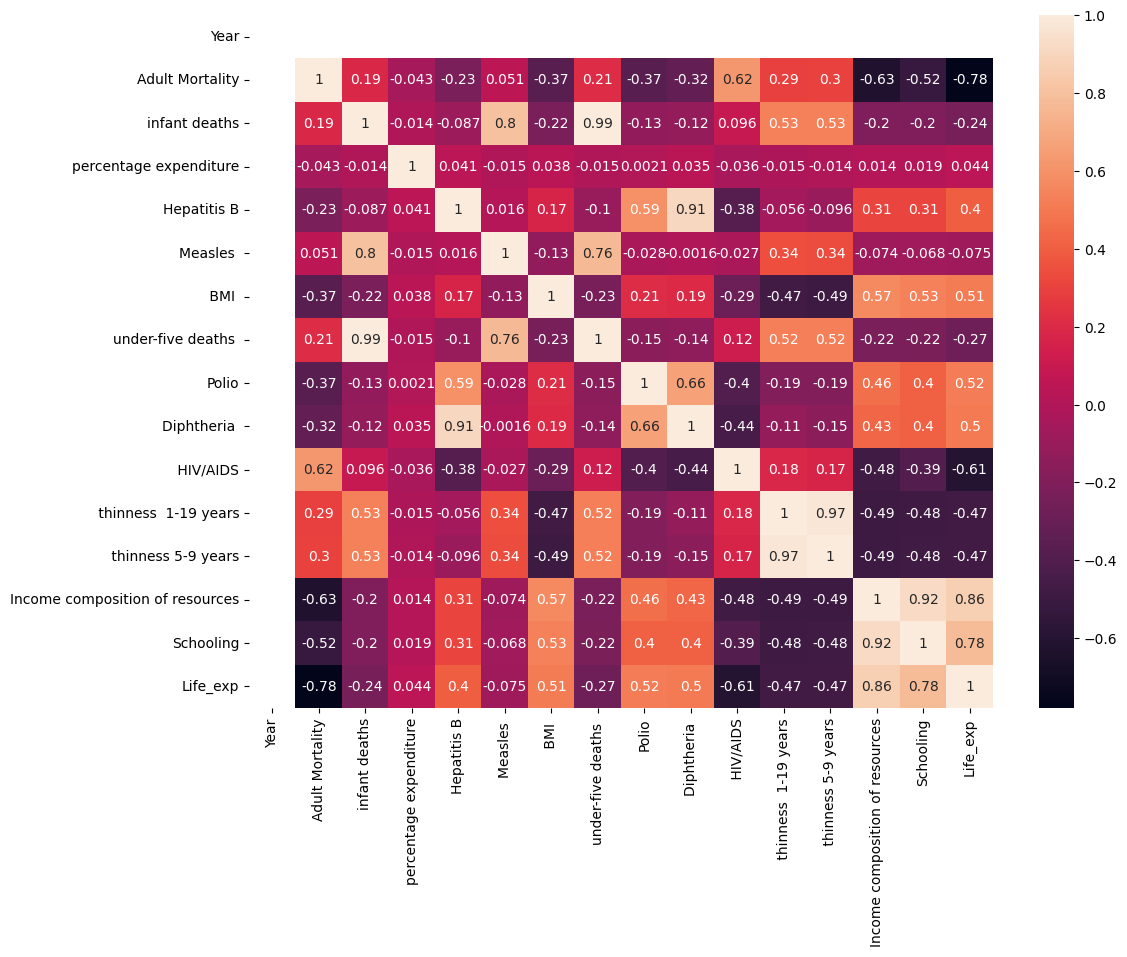

In [34]:


plt.figure(figsize=(12, 9)) 
sns.heatmap(df.corr(), annot=True)

In [35]:
df

,Country,Year,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life_exp
0,Afghanistan,2015,263.0,62,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,74.0,0,364.975229,99.0,0,58.0,0,99.0,99.0,0.1,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,19.0,21,0.000000,95.0,63,59.5,24,95.0,95.0,0.1,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,335.0,66,0.000000,64.0,118,23.3,98,7.0,64.0,1.9,8.3,8.2,0.531,11.4,52.4
4,Antigua and Barbuda,2015,13.0,0,0.000000,99.0,0,47.7,0,86.0,99.0,0.2,3.3,3.3,0.784,13.9,76.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2015,157.0,9,0.000000,87.0,0,62.1,10,87.0,87.0,0.1,1.6,1.5,0.769,14.3,74.1
179,Viet Nam,2015,127.0,28,0.000000,97.0,256,17.5,35,97.0,97.0,0.1,14.2,14.5,0.678,12.6,76.0
180,Yemen,2015,224.0,37,0.000000,69.0,468,41.3,47,63.0,69.0,0.1,13.6,13.4,0.499,9.0,65.7
181,Zambia,2015,33.0,27,0.000000,9.0,9,23.4,40,9.0,9.0,4.1,6.3,6.1,0.576,12.5,61.8


In [36]:
X = df.drop(columns=['Life_exp','Country','Year'])
y = df['Life_exp']

In [37]:
X

,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,263.0,62,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0.479,10.1
1,74.0,0,364.975229,99.0,0,58.0,0,99.0,99.0,0.1,1.2,1.3,0.762,14.2
2,19.0,21,0.000000,95.0,63,59.5,24,95.0,95.0,0.1,6.0,5.8,0.743,14.4
3,335.0,66,0.000000,64.0,118,23.3,98,7.0,64.0,1.9,8.3,8.2,0.531,11.4
4,13.0,0,0.000000,99.0,0,47.7,0,86.0,99.0,0.2,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,157.0,9,0.000000,87.0,0,62.1,10,87.0,87.0,0.1,1.6,1.5,0.769,14.3
179,127.0,28,0.000000,97.0,256,17.5,35,97.0,97.0,0.1,14.2,14.5,0.678,12.6
180,224.0,37,0.000000,69.0,468,41.3,47,63.0,69.0,0.1,13.6,13.4,0.499,9.0
181,33.0,27,0.000000,9.0,9,23.4,40,9.0,9.0,4.1,6.3,6.1,0.576,12.5


In [38]:
y

0      65.0
1      77.8
2      75.6
3      52.4
4      76.4
       ... 
178    74.1
179    76.0
180    65.7
181    61.8
182    67.0
Name: Life_exp, Length: 183, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 667
                                                    )

In [40]:
## 3 - Creare ed allenare il modello (fit) sulla parte di training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
model.coef_

array([-3.03200529e-02,  9.64000387e-02,  1.32158886e-01,  2.86279774e-02,
       -4.69539330e-05,  1.36486244e-02, -6.96296167e-02,  2.75319350e-02,
        4.51613993e-03, -2.84361065e-01, -3.36145255e-01, -3.65123887e-02,
        2.43743204e+01, -6.09147954e-02])

In [42]:
model.intercept_

56.21206971834698

In [43]:
## 4 - creare la predizione sulla parte di TEST
y_pred = model.predict(X_test) #on Test set

In [44]:
## 5 -  Misurare l'errore del mio modello
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R2_score: ', r2score)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2_score:  -0.16782541280808116
MAE:  3.331180439911408
MSE:  71.51686053539136
RMSE:  8.456764188233663


Non è ottimale, restringo le variabili, con limite 0,5 di correlazione

In [45]:
df.columns

Index(['Country', 'Year', 'Adult Mortality', 'infant deaths',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Diphtheria ', ' HIV/AIDS',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life_exp'],
      dtype='object')

In [47]:
X = df.drop(columns=['Life_exp','Measles ','Country','Year','infant deaths', 'percentage expenditure', 'Hepatitis B','under-five deaths ',' thinness  1-19 years',' thinness 5-9 years'])
y = df['Life_exp']

In [ ]:
X

,Adult Mortality,Measles,BMI,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,263.0,1154,19.1,6.0,65.0,0.1,0.479,10.1
1,74.0,0,58.0,99.0,99.0,0.1,0.762,14.2
2,19.0,63,59.5,95.0,95.0,0.1,0.743,14.4
3,335.0,118,23.3,7.0,64.0,1.9,0.531,11.4
4,13.0,0,47.7,86.0,99.0,0.2,0.784,13.9
...,...,...,...,...,...,...,...,...
178,157.0,0,62.1,87.0,87.0,0.1,0.769,14.3
179,127.0,256,17.5,97.0,97.0,0.1,0.678,12.6
180,224.0,468,41.3,63.0,69.0,0.1,0.499,9.0
181,33.0,9,23.4,9.0,9.0,4.1,0.576,12.5


In [48]:
y

0      65.0
1      77.8
2      75.6
3      52.4
4      76.4
       ... 
178    74.1
179    76.0
180    65.7
181    61.8
182    67.0
Name: Life_exp, Length: 183, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 667
                                                    )

In [50]:
#Rireare ed allenare il modello (fit) sulla parte di training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
model.coef_

array([-3.06081692e-02,  2.71570027e-02,  1.25351670e-02,  3.69064149e-02,
       -5.26517444e-01,  2.51317511e+01,  8.09303960e-02])

In [52]:
model.intercept_

52.728571298135414

In [53]:
#ricreare la predizione sulla parte di TEST
y_pred = model.predict(X_test) #on Test set

In [56]:
#Rimisurare l'errore del mio modello
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R2_score: ', r2score)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2_score:  0.8933055082634351
MAE:  1.882820686797566
MSE:  6.533900531476408
RMSE:  2.5561495518604556


Ora posso procedere, verificato la congruenza degli errori

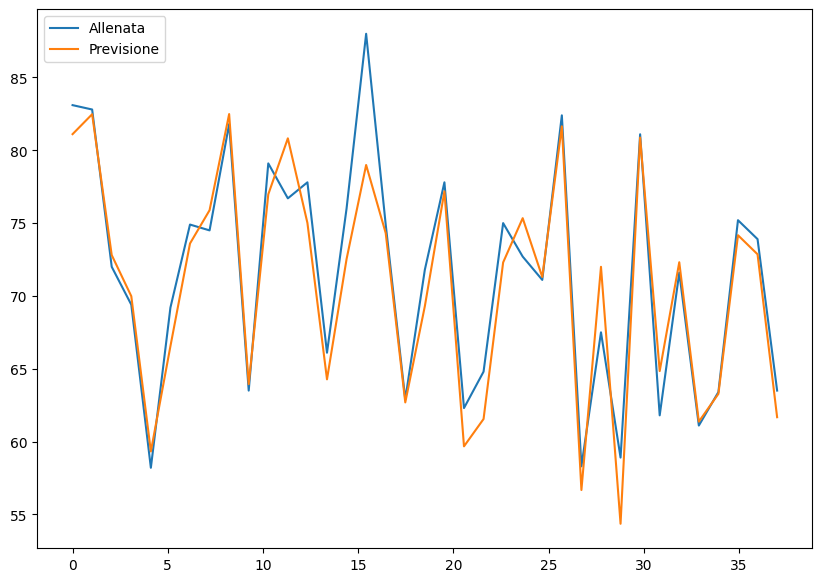

In [57]:
import numpy as np
import matplotlib.pyplot as plt
length = y_pred.shape[0]
k = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(k,y_test, label="Allenata")
plt.plot(k,y_pred, label="Previsione")
plt.legend(loc=2)

In [59]:
## to save a model , salvo un modello in file pkl
joblib.dump(model,'regression_test.pkl')

['regression_test.pkl']

In [60]:
newmodel = joblib.load('regression_test.pkl')
newmodel

LinearRegression()

In [63]:
X

,Adult Mortality,BMI,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,263.0,19.1,6.0,65.0,0.1,0.479,10.1
1,74.0,58.0,99.0,99.0,0.1,0.762,14.2
2,19.0,59.5,95.0,95.0,0.1,0.743,14.4
3,335.0,23.3,7.0,64.0,1.9,0.531,11.4
4,13.0,47.7,86.0,99.0,0.2,0.784,13.9
...,...,...,...,...,...,...,...
178,157.0,62.1,87.0,87.0,0.1,0.769,14.3
179,127.0,17.5,97.0,97.0,0.1,0.678,12.6
180,224.0,41.3,63.0,69.0,0.1,0.499,9.0
181,33.0,23.4,9.0,9.0,4.1,0.576,12.5


In [65]:
y

0      65.0
1      77.8
2      75.6
3      52.4
4      76.4
       ... 
178    74.1
179    76.0
180    65.7
181    61.8
182    67.0
Name: Life_exp, Length: 183, dtype: float64

newmodel.predict([[263,19.1,6.0,65.0,0.1,0.479,10.1]])[0] #faccio inferenza con il nuovo modello, ossia previsione inserendo 3 input

La predizione riporta 60.474 sulla prima riga, l'actual riporta 65, la diffrenza è dovuta all'errore